In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load and read csv file
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [3]:
# View the shape of the dataset
print('Shape:', df.shape)
print('Missing value counts:', df.isnull().any().sum())
print('Duplicated entries:', df.duplicated().sum())

Shape: (2938, 22)
Missing value counts: 14
Duplicated entries: 0


In [4]:
# Focusing on 'Status' only hence dropping column 'Country' 
Life_df = df.drop(['Country'], axis=1)
Life_df.head()

Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0  2015  Developing              65.0            263.0             62   
1  2014  Developing              59.9            271.0             64   
2  2013  Developing              59.9            268.0             66   
3  2012  Developing              59.5            272.0             69   
4  2011  Developing              59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   ...  Polio  \
0     0.01               71.279624         65.0      1154   19.1  ...    6.0   
1     0.01               73.523582         62.0       492   18.6  ...   58.0   
2     0.01               73.219243         64.0       430   18.1  ...   62.0   
3     0.01               78.184215         67.0      2787   17.6  ...   67.0   
4     0.01                7.097109         68.0      3013   17.2  ...   68.0   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16         65.0        0.1  584.259210  33736494.0   
1               8.18         62.0        0.1  612.696514    327582.0   
2               8.13         64.0        0.1  631.744976  31731688.0   
3               8.52         67.0        0.1  669.959000   3696958.0   
4               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 21 columns]

In [5]:
# Check the info of the dataset
Life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [6]:
# Check missing values
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

<AxesSubplot:>

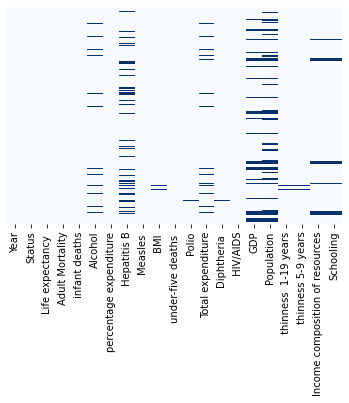

In [7]:
# using heatmap to view missing values
sns.heatmap(Life_df.isnull(), yticklabels=False, cbar=False, cmap = 'Blues')

In [8]:
# View statistical summary of the dataset
Life_df.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

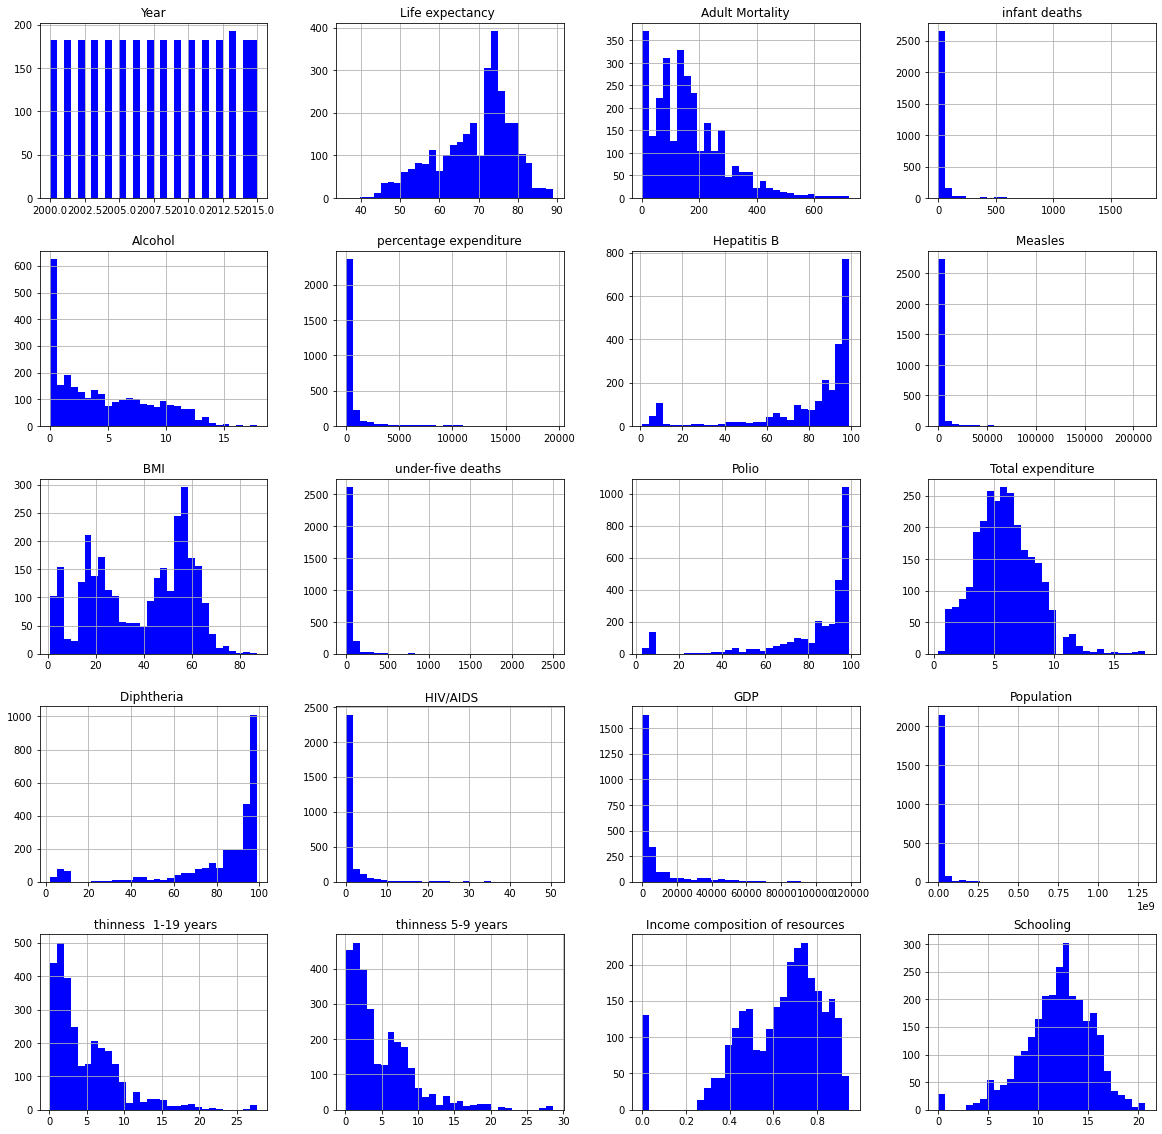

In [9]:
# Plot histogram 
Life_df.hist(bins=30, figsize=(20,20), color ='b')
plt.show()

<AxesSubplot:>

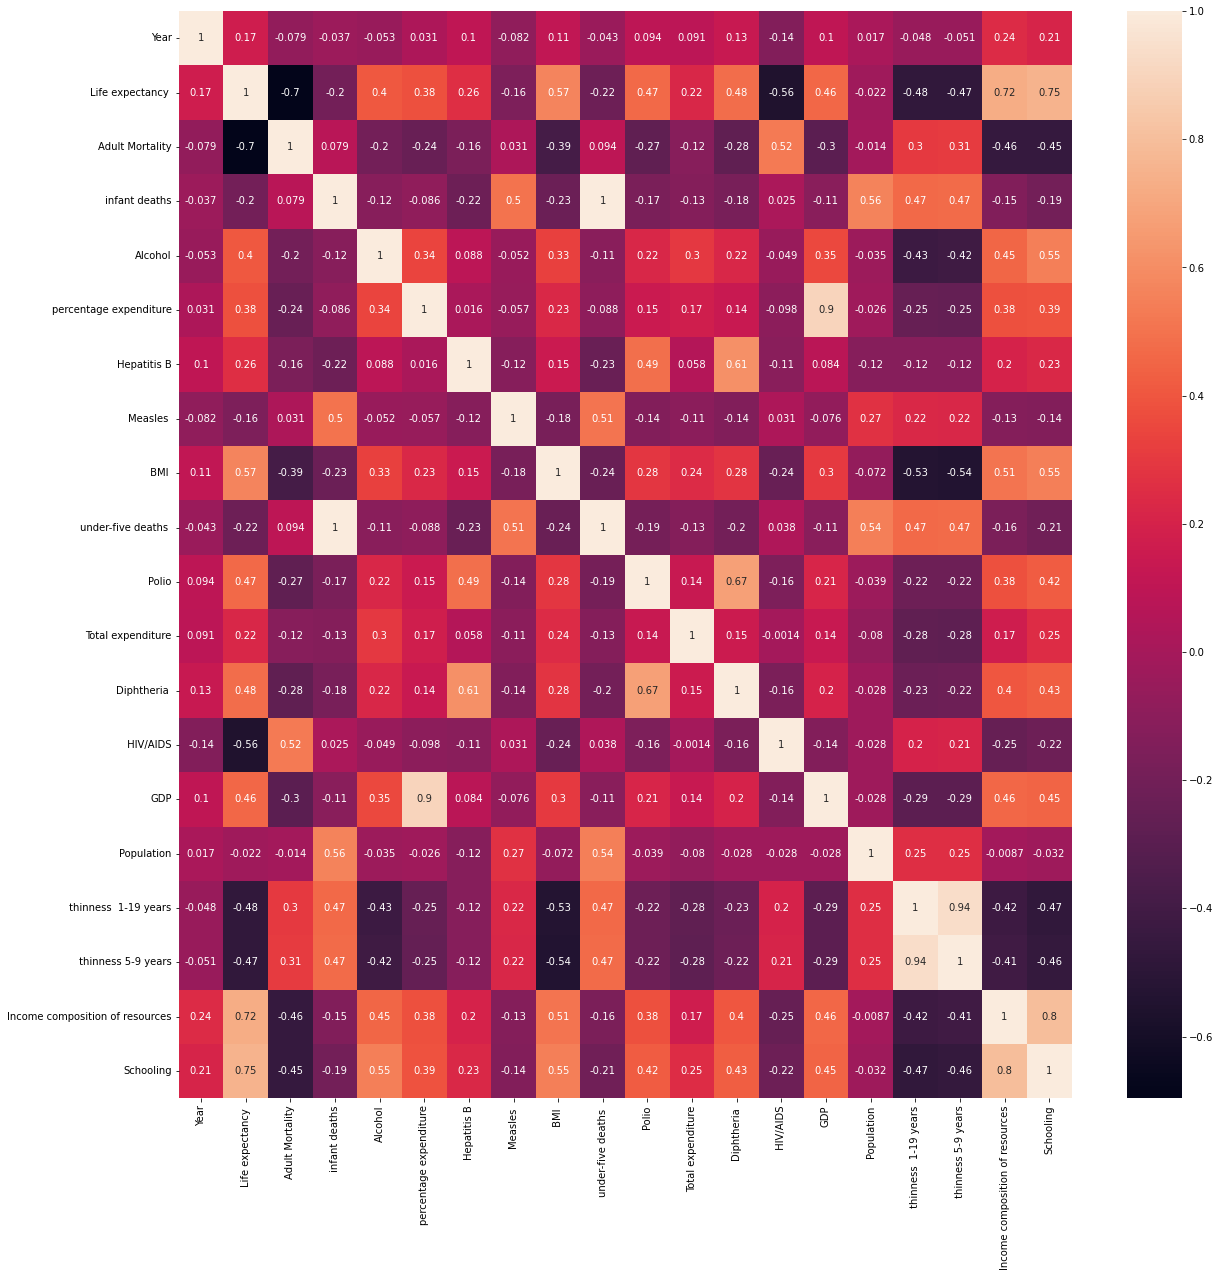

In [10]:
# Plot correlation heatmap
plt.figure (figsize=(20,20))
sns.heatmap(Life_df.corr(), annot=True)

<AxesSubplot:xlabel='Schooling', ylabel='Life expectancy '>

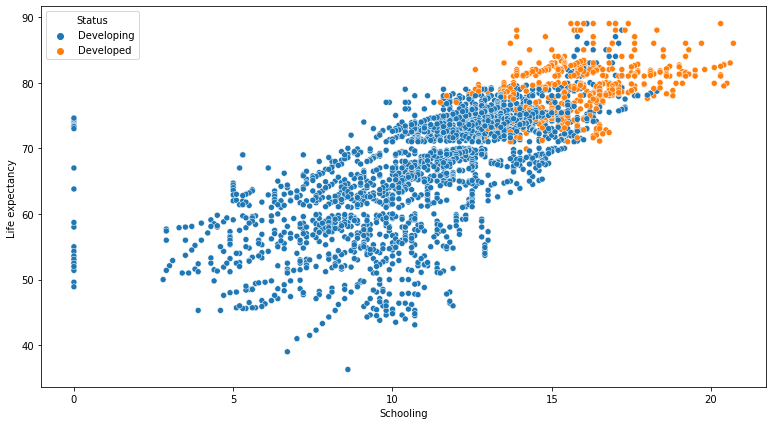

In [11]:
# High correlation between Schooling and Life Expectancy
# Plot scatterplot
plt.figure(figsize=(13,7))
sns.scatterplot(data= Life_df, x = 'Schooling', y = 'Life expectancy ', hue = 'Status')

Population in countries with higher education level had higher life expectancy compared to those with lower education. Highest life expectancy can be seen in most developed countries.

<AxesSubplot:xlabel='Income composition of resources', ylabel='Life expectancy '>

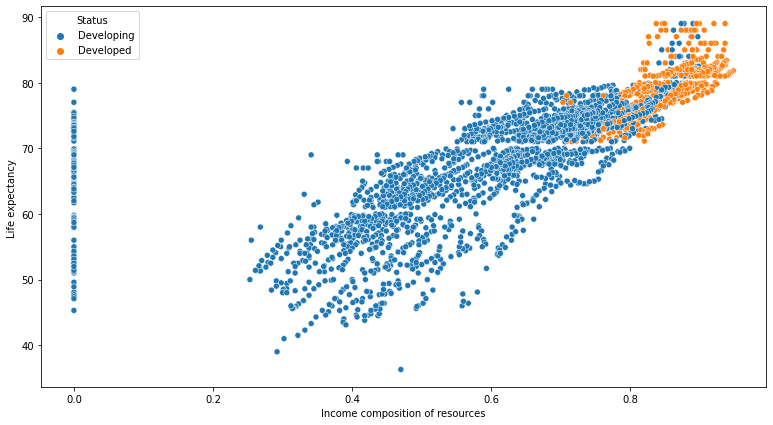

In [12]:
# High correlation between Income composition of resources and Life Expectancy
# Plot scatterplot
plt.figure(figsize=(13,7))
sns.scatterplot(data= Life_df, x = 'Income composition of resources', y = 'Life expectancy ', hue = 'Status')

Highest life expectancy was observed in population of the countries that had highest income composition of resources. 

In [13]:
# Plot Violin plot to view statistical representation of country status

import plotly.express as px
fig = px.violin(Life_df, x='Status', y='Life expectancy ', color='Status', box=True, title='Life expectancy Based on Countries status')
fig.show()

In [14]:
# Create One-Hot encoding for categorical variable using .get_dummies()
Life_df = pd.get_dummies(Life_df, columns=['Status'], drop_first=True)
Life_df.head()

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0  2015              65.0            263.0             62     0.01   
1  2014              59.9            271.0             64     0.01   
2  2013              59.9            268.0             66     0.01   
3  2012              59.5            272.0             69     0.01   
4  2011              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   ...  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0  ...               8.16         65.0        0.1  584.259210  33736494.0   
1  ...               8.18         62.0        0.1  612.696514    327582.0   
2  ...               8.13         64.0        0.1  631.744976  31731688.0   
3  ...               8.52         67.0        0.1  669.959000   3696958.0   
4  ...               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  Status_Developing  
0                            0.479       10.1                  1  
1                            0.476       10.0                  1  
2                            0.470        9.9                  1  
3                            0.463        9.8                  1  
4                            0.454        9.5                  1  

[5 rows x 21 columns]

In [15]:
# Rename generated column back to 'Status'
Life_df.rename(columns = {'Status_Developing':'Status'}, inplace = True)
Life_df.head()

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0  2015              65.0            263.0             62     0.01   
1  2014              59.9            271.0             64     0.01   
2  2013              59.9            268.0             66     0.01   
3  2012              59.5            272.0             69     0.01   
4  2011              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   ...  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0  ...               8.16         65.0        0.1  584.259210  33736494.0   
1  ...               8.18         62.0        0.1  612.696514    327582.0   
2  ...               8.13         64.0        0.1  631.744976  31731688.0   
3  ...               8.52         67.0        0.1  669.959000   3696958.0   
4  ...               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  Status  
0                            0.479       10.1       1  
1                            0.476       10.0       1  
2                            0.470        9.9       1  
3                            0.463        9.8       1  
4                            0.454        9.5       1  

[5 rows x 21 columns]

In [16]:
# Check unique values of Status column
Life_df['Status'].unique()

array([1, 0], dtype=uint8)

#### Dealing with missing values

In [17]:
# Check number of null values again
# Decide what to do with missing values
Life_df.isna().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Status                               0
dtype: int64

In [18]:
# Since most missing values are continuous values, fill with mean
Life_df = Life_df.apply(lambda x: x.fillna(x.mean()), axis= 0)

<AxesSubplot:>

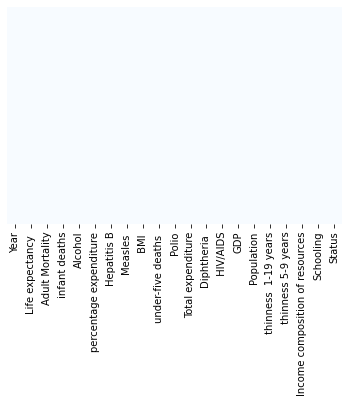

In [19]:
# Using heatmap to view missing values
sns.heatmap(Life_df.isna(), yticklabels=False, cbar=False, cmap = 'Blues')

#### Prepare data before modeling

In [20]:
# Determine inputs and output data to create train & test data
X = Life_df.drop(columns=['Life expectancy '])
y = Life_df['Life expectancy ']

In [21]:
Life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Life expectancy                  2938 non-null   float64
 2   Adult Mortality                  2938 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   Alcohol                          2938 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2938 non-null   float64
 7   Measles                          2938 non-null   int64  
 8    BMI                             2938 non-null   float64
 9   under-five deaths                2938 non-null   int64  
 10  Polio                            2938 non-null   float64
 11  Total expenditure                2938 non-null   float64
 12  Diphtheria          

In [22]:
X.shape

(2938, 20)

In [23]:
# convert X, y to 'float32' and in numpy arrays
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

#### Modeling using XG-Boost

In [24]:
# Perform train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
# Import key metrics
from sklearn.metrics import mean_squared_error, accuracy_score

In [26]:
# Train an XG-boost algorithm
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', learning_rate=0.1, max_depth=30, n_estimators=100)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=30, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [27]:
# Make predictions
y_predict = xgb_model.predict(X_test)

In [28]:
# Score the model using testing dataset
xgb_model_accuracy = xgb_model.score(X_test, y_test)
xgb_model_accuracy

0.96291678014172

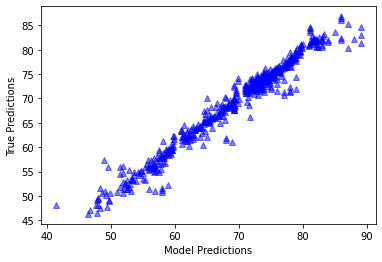

In [29]:
# Plot trained model predictions vs. ground truth output
plt.plot(y_test, y_predict,'^', color='b', alpha=0.5)
plt.xlabel('Model Predictions')
plt.ylabel('True Predictions')
plt.show()

In [30]:
# Plot the KPIs
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = float(format(mean_squared_error(y_test, y_predict),'.3f'))
MAE = float(format(mean_absolute_error(y_test, y_predict),'.3f'))
r2 = float(format(r2_score(y_test, y_predict),'.3f'))

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 1.767 
MSE = 3.124 
MAE = 1.081 
R2 = 0.963
